C:\Users\Haekala\AppData\Local\Temp\ipykernel_8020\19963360.py:11: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


jumlah titik terdeteksi =  1000


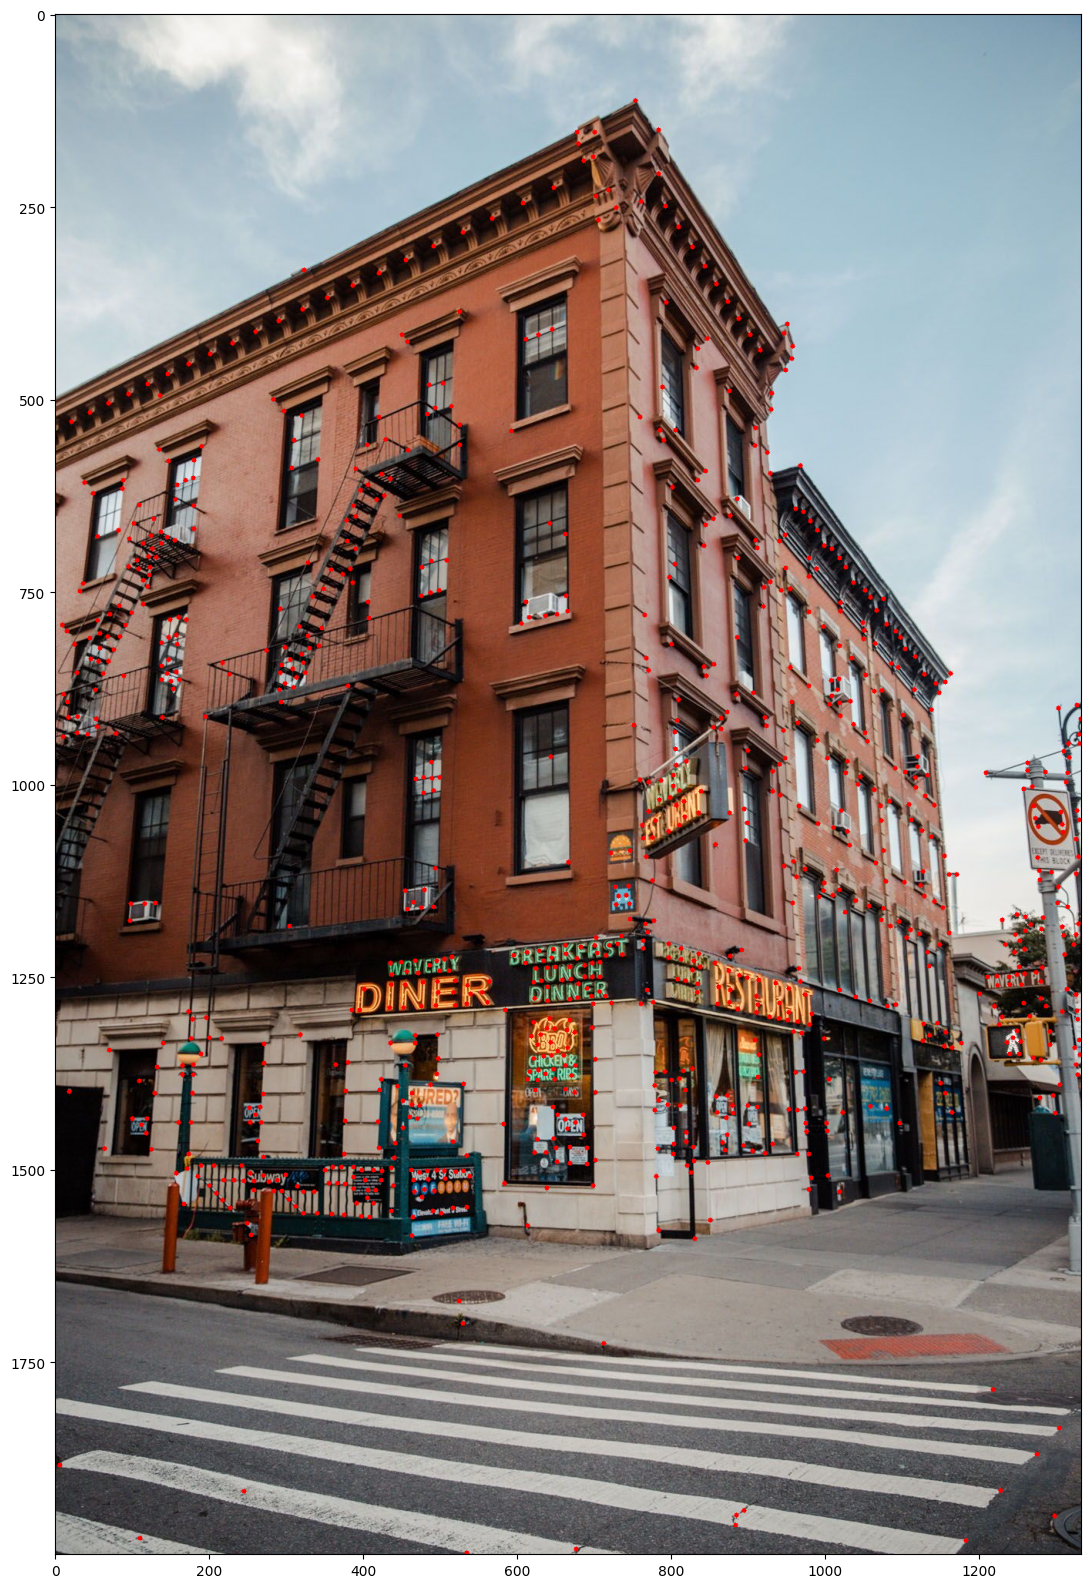

(<matplotlib.image.AxesImage at 0x21aad384b10>, None)

In [34]:
# Menggunakan Shi-Tomasi GFTT untuk deteksi ujung (corner detection)
import numpy as np
import cv2
from matplotlib import pyplot as plt
# gunakan gambar
img = cv2.imread('city.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# deteksi pojok dengan GFTT
corners = cv2.goodFeaturesToTrack(gray,1000,0.01,10)
corners = np.int0(corners)
# menampilkan jumlah titik terdeteksi dengan fungsi numpy (np.ndarray.shape)
print("jumlah titik terdeteksi = ", corners.shape[0])
# untuk ditampilkan di Matplotlib, urutan band dibalik
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (20,20)
# untuk tiap pojok yang terdeteksi, munculkan pada gambar
for i in corners:
    x,y = i.ravel()
    cv2.circle(rgb,(x,y),3,255,-1)
plt.imshow(rgb),plt.show()

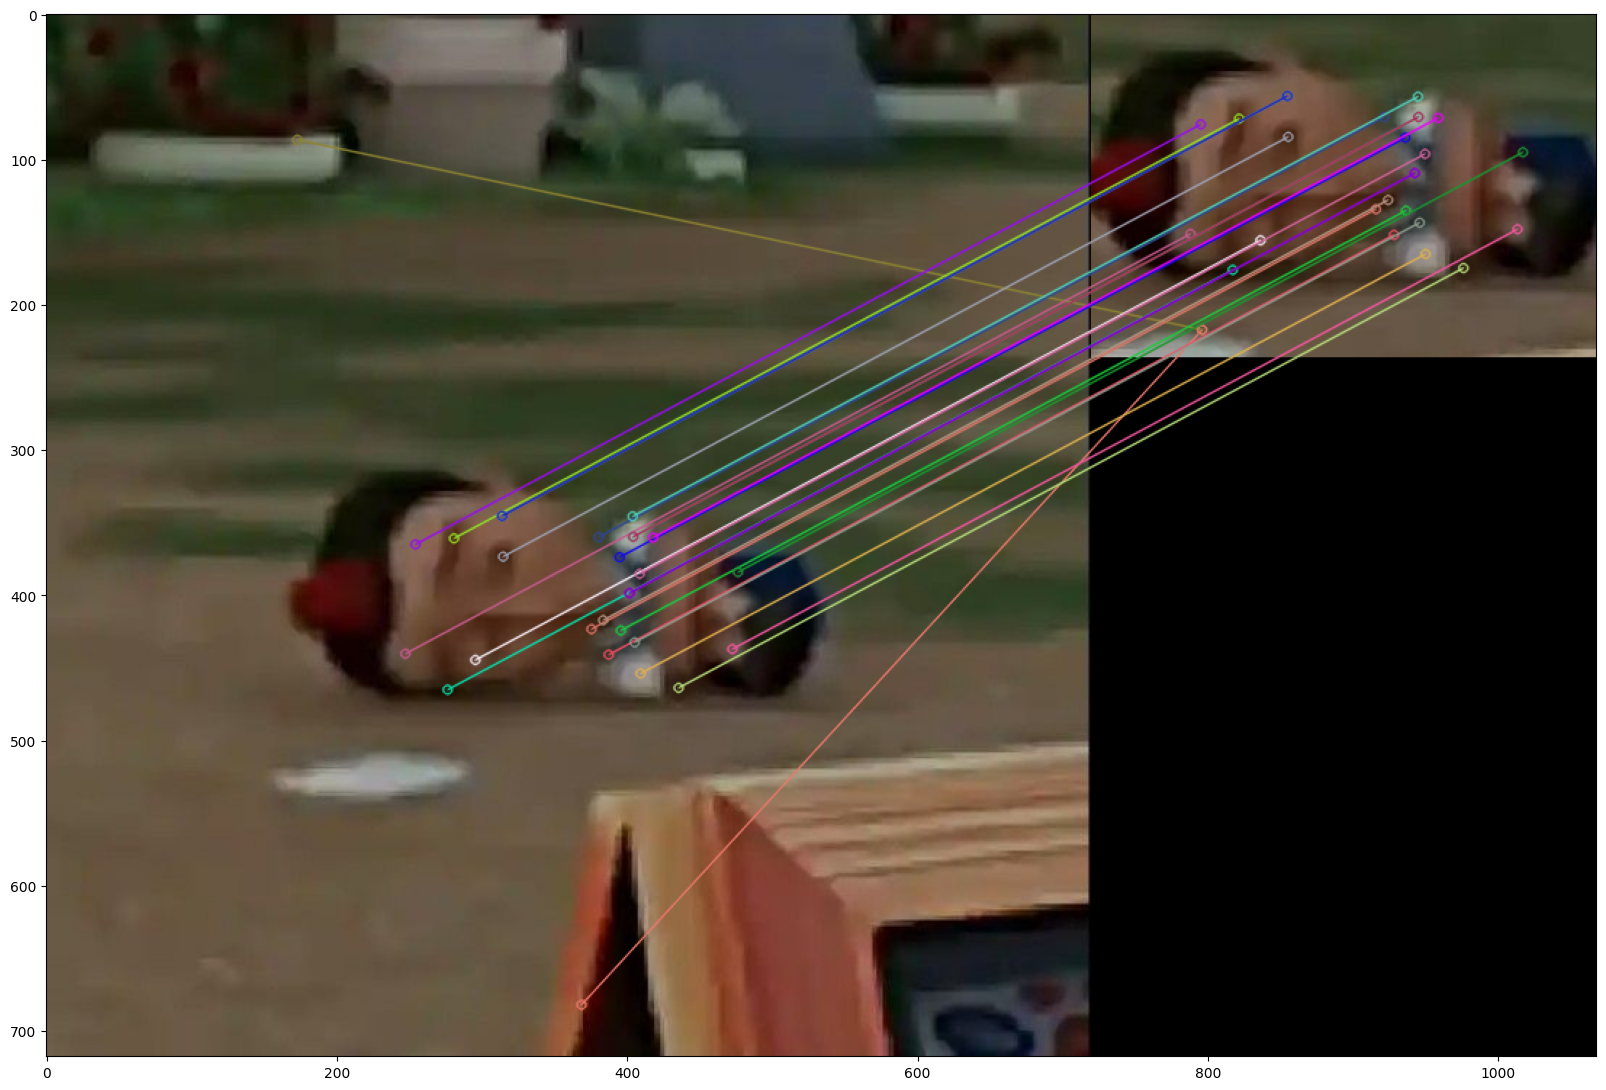

(<matplotlib.image.AxesImage at 0x21aad3de7d0>, None)

In [35]:
# Gunakan gambar yang ada pada laptop masing-masing
img1 = cv2.imread('jirjat.jpg') # gambar yang dituju
img2 = cv2.imread('jarjit.jpg') # gambar yang dicari
gray1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
# Menggunakan Detector SIFT
sift = cv2.SIFT_create()
# Mencari Keypoint dengan SIFT
kp1, des1 = sift.detectAndCompute(gray1,None)
kp2, des2 = sift.detectAndCompute(gray2,None)
# Melakukan Matching dari hasil deteksi keypoints menggunakan
# BruteForce Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# Uji rasio matching sederhana
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])
img3 = None
# menggambar hasil match pada gambar baru (IMG3)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)),plt.show()

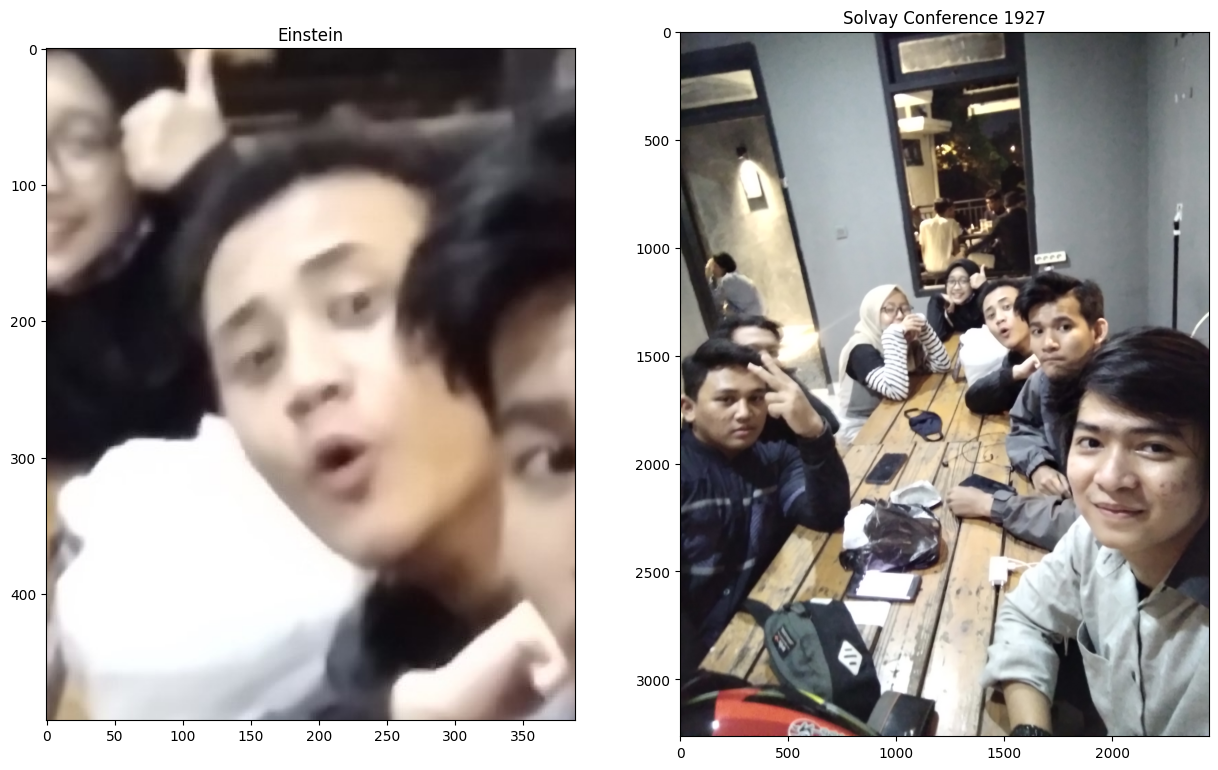

In [39]:
# panggil dan konversi warna agar sesuai dengan Matplotlib
Haekal = cv2.imread('E:/FOLDER KULIAH/SMT 6/PCD/Pertemuan 14/fotsen.jpg')
Haekal = cv2.cvtColor(Haekal, cv2.COLOR_BGR2RGB) 
# simpan dengan nama yang sama = ditumpuk
# panggil dan konversi warna agar sesuai dengan Matplotlib
rame = cv2.imread('E:/FOLDER KULIAH/SMT 6/PCD/Pertemuan 14/fotbar.jpg')
rame = cv2.cvtColor(rame, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(Haekal), plt.title('Einstein')
plt.subplot(122),plt.imshow(rame), plt.title('Solvay Conference 1927')
plt.show()

hasil metode cv2.TM_SQDIFF_NORMED : 


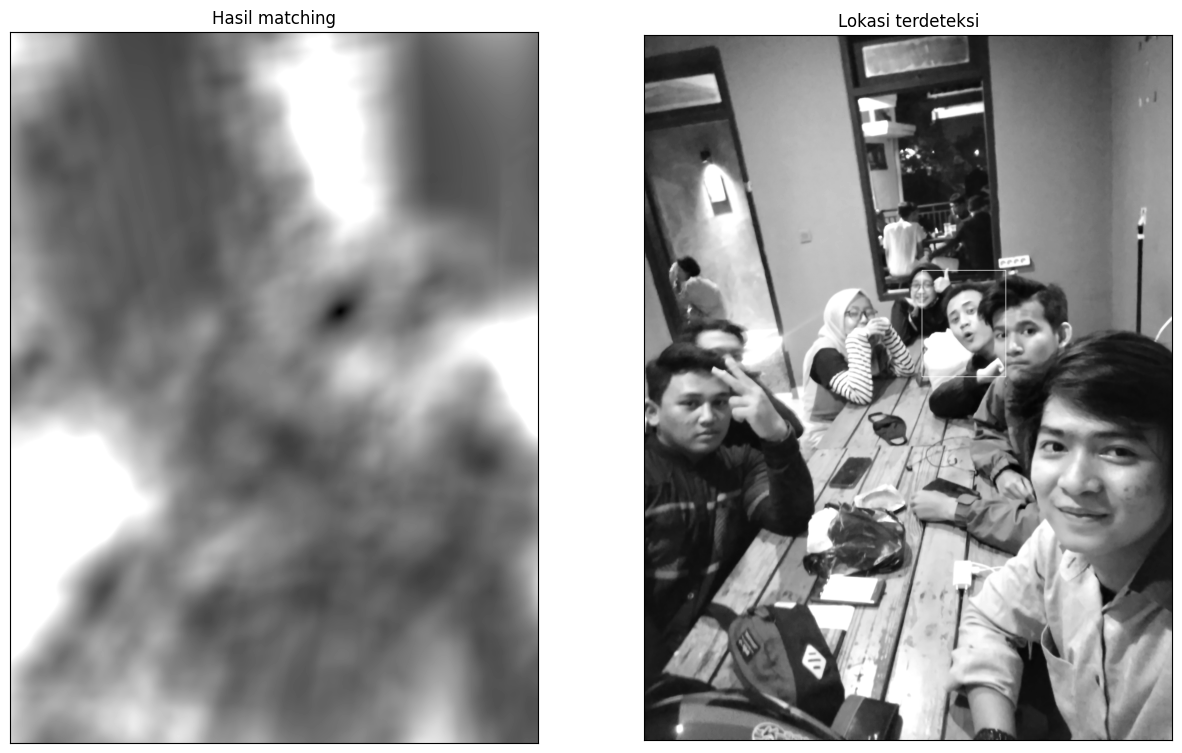

In [38]:
img = cv2.imread('fotbar.jpg',0)
img2 = img.copy()
template = cv2.imread('fotsen.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (15,15)
for met in methods:
    img = img2.copy()
method = eval(met)
# menggunakan template matching
res = cv2.matchTemplate(img,template,method)
# mencari ukuran citra template untuk menggambar kotak
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# metode TM_SQDIFF dan TM_SQDIFF_NORMED menggunakan persamaan yang sedikitberbeda
# sehingga dibuatkan fungsi khusus untuk mengambil nilai minimum
if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
else:
    top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# buat persegi pada lokasi yang ditemukan
cv2.rectangle(img, top_left, bottom_right, 255, 2) # 2 adalah ketebalan gariskotak
print("hasil metode", met, ": " )
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Hasil matching'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Lokasi terdeteksi'), plt.xticks([]), plt.yticks([])

plt.show()

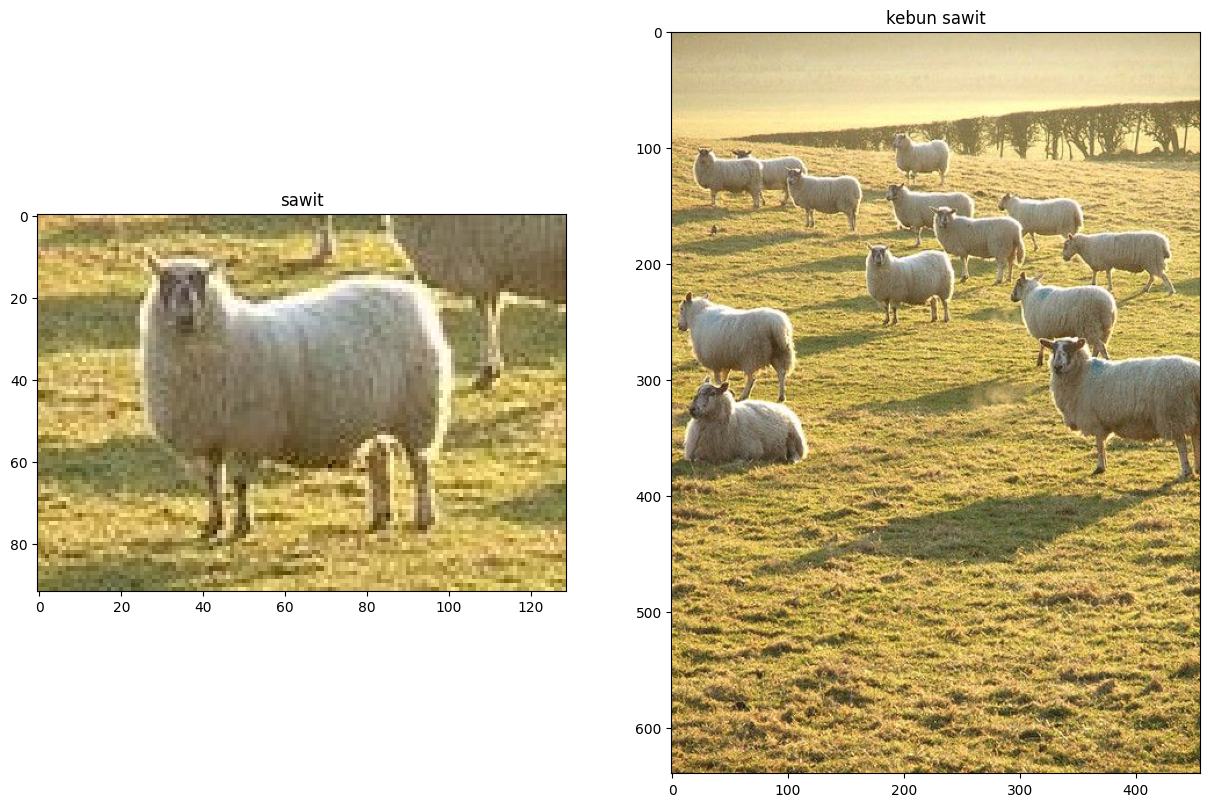

In [48]:
# tampilkan kedua gambar
from matplotlib import pyplot as plt
# panggil dan konversi warna agar sesuai dengan Matplotlib
kambing = cv2.imread('kambing.jpg')
kambing = cv2.cvtColor(kambing, cv2.COLOR_BGR2RGB)
# panggil dan konversi warna agar sesuai dengan Matplotlib
ternak = cv2.imread('ternak.jpg')
ternak = cv2.cvtColor(ternak, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(kambing), plt.title('kambing')
plt.subplot(122),plt.imshow(ternak), plt.title('Kambing banyak')
plt.show()

In [49]:
## membaca gambar utuh untuk dicari
img_rgb = cv2.imread('ternak.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
## membaca template
template = cv2.imread('kambing.jpg',0)
## ukuran template. ukuran ini akan digunakan untuk menggambar kotak
w, h = template.shape[::-1]
# menggunakan metode COEFF-NORMALIZED
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
# Nilai threshold atau ambang batas deteksi kemiripan titik.
# Lakukan eksperimen dengan merubah nilai ini
threshold = 0.15
loc = np.where(res >= threshold)
## membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi
lspoint=[]
lspoint2=[]
count = 0 # untuk menyimpan jumlah matching yang ditemukan
for pt in zip(*loc[::-1]):
## jika sudah ada, skip lokasi tersebut
    if pt[0] not in lspoint and pt[1] not in lspoint2:
## gambar persegi warna kuning dengan ketebalan dua poin
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
        for i in range(((pt[0])-9), ((pt[0])+9),1):
        ## tambahkan koordinat x ke list
            lspoint.append(i)
        for k in range(((pt[1])-9), ((pt[1])+9),1):
        ## tambahkan koordinat y ke list
            lspoint2.append(k)
            count+=1 ### berapa jumlah matching yang ditemukan?
    else:
        continue
print("jumlah objek ditemukan", count)
cv2.imshow("Detected Objects", img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

jumlah objek ditemukan 432
